Compute stats for Completness


Imports

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import wilcoxon
from cliffs_delta import cliffs_delta
import matplotlib.pyplot as plt

Read Input Data

In [2]:
# Load the csv files
excel_data_MostTemplates = pd.read_csv('..\\output\\completnessReqs-310-2345-1-MostTemplates.csv', sep=';', decimal=',')
excel_data_Random = pd.read_csv('..\\output\\completnessReqs-510-110-1-Random.csv', sep=';', decimal=',')

# Read the values of the file in the dataframe
data_MostTemplates = pd.DataFrame(excel_data_MostTemplates)
data_Random = pd.DataFrame(excel_data_Random)

# Print the content
# print("The content of the file is:\n", data_MostTemplates)

Test for normality

In [3]:
def CheckNormality(dataFrame):
   mostTemplatesNotNormality = []
   for index, row in dataFrame.iterrows():
      dataToTest = list(row)[1:]
      result = shapiro(dataToTest)
      if (result.pvalue > 0.05):
         mostTemplatesNotNormality.append(index)
   return (mostTemplatesNotNormality)

print(CheckNormality(excel_data_MostTemplates))
print(CheckNormality(excel_data_Random))

[16, 18, 19, 20, 24, 27, 28, 29, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692]
[303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 365, 366, 369, 370, 377, 381, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 402, 403, 404, 405, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 692]


C:\Users\Sylwia\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Test Wilcoxon

In [4]:
def CompareTwoAlgorithms(dataFrame1, dataFrame2):
   resultDataFrame = pd.DataFrame(columns=( 'Statistic', 'p-value', 'P-Testing', 'CliffsDelta','CliffsDelta Name'))
   i = 0
   for index, row in dataFrame1.iterrows():
      dataToTest1 = list(row)[1:]
      dataToTest2 = dataFrame2.values[i][1:]
      #print(dataToTest2)
      result = wilcoxon(dataToTest1, dataToTest2, alternative='greater')
      #print(result.pvalue)
      effSize, effSizeNum = cliffs_delta(dataToTest1, dataToTest2)
      resultDataFrame.loc[len(resultDataFrame)] = [ result.statistic, result.pvalue, (result.pvalue < 0.05), effSize, effSizeNum] 
   return resultDataFrame

testingResult = (CompareTwoAlgorithms(excel_data_MostTemplates, excel_data_Random))

Plot data

In [18]:
myboxplot = excel_data_Random.iloc[:, 1:].T.boxplot(sym='', return_type='axes')
myboxplot.title("Random")


ValueError: The number of FixedLocator locations (693), usually from a call to set_ticks, does not match the number of ticklabels (10).

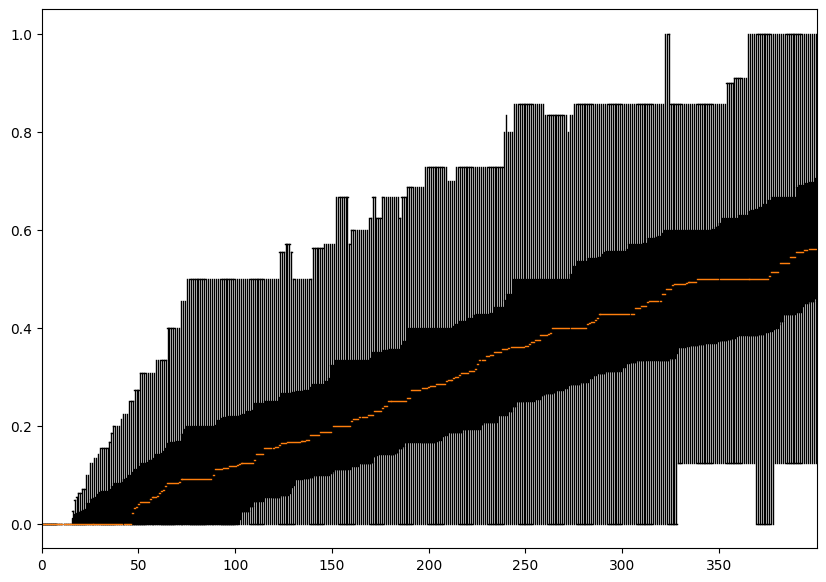

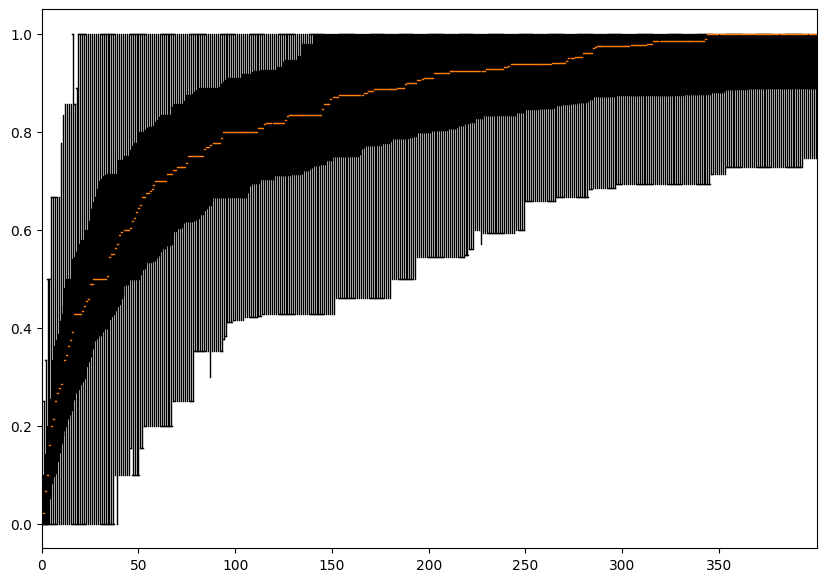

In [32]:
from matplotlib.pyplot import xticks


fig= plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(excel_data_Random.iloc[:400, 1:].T, sym='')
plt.xticks(ticks=np.arange(0,400,step=50), labels=np.arange(0,400, step=50))
plt.title("Random")
# show plot
plt.show()


fig= plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(excel_data_MostTemplates.iloc[:400, 1:].T, sym='')
plt.xticks(ticks=np.arange(0,400,step=50), labels=np.arange(0,400, step=50))
plt.title("Most Templates")
# show plot
plt.show()